# Proyecto final
## Proyectos de inversión en Cali
#### Johan Steven Caicedo Rodríguez

In [118]:
#Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import nltk
import re
import string
import nltk
from nltk.corpus import stopwords
#!pip install wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap
from scipy import stats
import plotly.express as px

In [146]:
# primer archivo con datos básicos
data_basico = pd.read_csv("DNP-proyectos_datos_basicos.csv", sep=",")

#Segundo archivo con seguimientos
data_segui = pd.read_csv("DNP-SeguimientoProyecto.csv", sep=",")

#Tercer archivo con ejecución financiera
data_finan = pd.read_csv("DNP-EjecucionFinancieraProy.csv", sep=",")

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\1770430190.py:2: DtypeWarning:

Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\1770430190.py:8: DtypeWarning:

Columns (0,14,17) have mixed types. Specify dtype option on import or set low_memory=False.



In [6]:
data_basico.head(1)

,Bpin,NombreProyecto,ObjetivoGeneral,EstadoProyecto,Horizonte,Sector,EntidadResponsable,ProgramaPresupuestal,TipoProyecto,PlanDesarrolloNacional,ValorTotalProyecto,ValorVigenteProyecto,ValorObligacionProyecto,ValorPagoProyecto,SubEstadoProyecto,CodigoEntidadResponsable
0,2021055910046,Construcción De Vivienda Para Disminuir El Déf...,Disminución del déficit cuantitativo de vivien...,En Ejecución,2021-2021,"Vivienda, Ciudad Y Territorio",Municipio de Puerto Triunfo,4001 ACCESO A SOLUCIONES DE VIVIENDA,Sgr,NaN,3.601409e+09,3.601409e+09,0.0,1.714388e+09,Contratado en ejecución (SGR),890983906


In [4]:
data_segui.head(1)

,Bpin,AvanceFisico,AvanceFinanciero,NombreProyecto,Horizonte,SectorProyecto,ValorVigente,EntidadResponsable
0,2020255720039,100.0,71.666319,Mejoramiento De Vía Que Comunica El Casco Urba...,2020-2020,Transporte,7.699260e+08,Municipio de Puerto Salgar


In [5]:
data_finan.head(1)

,BPIN,Nombre del proyecto,Sector,Fuentedefinanciación,Horizonte,Vigencia,ValorSolicitado,ValorInicial,ValorVigente,ValorComprometido,ValorObligado,ValorPagado,EntidadResponsable,TipoEntidadFuenteFinanciacion,CodigoEntidadFuenteFinanciacion,EntidadFuenteFinanciacion,TipoRecursoFuenteFinanciacion,CodigoEntidadResponsable
0,0041007170000,Mejoramiento Y Mantenimiento Carretera Patico-...,Transporte,PGN - Presupuesto General de la Nación,2001-2021,2013,1.000000e+10,9.000000e+09,9.000000e+09,9.000000e+09,8.259759e+09,6.448792e+09,Instituto Nacional de Vias - Transporte,Entidades Presupuesto Nacional - PGN,240200,Instituto Nacional de Vias - Transporte,PGN - Nación - Inversión,240200


In [147]:
#Se renombran variables
data_segui = data_segui.rename(columns={'SectorProyecto': 'Sector'})
data_segui = data_segui.rename(columns={'ValorVigente': 'ValorVigenteProyecto'})
data_finan = data_finan.rename(columns={'BPIN': 'Bpin'})
data_finan = data_finan.rename(columns={'Nombre del proyecto': 'NombreProyecto'})

In [148]:
                            ## Organización dataset: "data_basico"

##Se eliminan celdas vacias
data_basico = data_basico.dropna(subset=['EntidadResponsable'])

##se filtran solo las ciudad de Cali y valle.
data_basico = data_basico[data_basico.EntidadResponsable.str.contains('cali|valle', case = False)]

#Se dejan todas las entradas en minuscula
data_basico["EntidadResponsable"] = data_basico['EntidadResponsable'].str.lower()

            ##Se eliminan expresiones que contiene "cali", pero no son la ciudad
    
##Se crea lista de todas las entidades que contienen "cali" y "valle"
no_cali_list = list(data_basico.EntidadResponsable.unique())

()


##Se convierte la lista en minusculas
#for i in range(len(no_cali_list)):
 #   no_cali_list[i] = no_cali_list[i].lower()

#Se dejan palabras que no sea la ciudad "Cali" o "valle"
lista_no_cali = ["fiscalia", "calima", "california", "calixto", "sinu", "valledupar", "tolima", "guamuez", "restrepo", "san pedro", "putumayo", "sibundoy", "palmira", "yotoco", "valledupar", "cesar", "cairo", "caicedonia", "tulu", "buenaventuravalle", "la unión", "bugalagrande", "candelaria", "bolívar", "dagua", "alcala", "florida", "águila", "ansermanuevo", "jamund", "cumbre", "buga", "trujillo", "cartago", "pradera", "guacar", "versalles", "yumbo", "sevilla", "roldanillo", "riofrio", "victoria", "union", "cerrito", "obando", "dovio", "argelia", "vijes", "toro", "ulloa", "santander", "andaluc", "san juan", "uceva", "ginebra", "aburrá", "ronces", "zarzal", "alcalá", "de buenaventura"]
palabras_elmin =[]

for i in range(len(no_cali_list)):
    for a in lista_no_cali:
        if a in no_cali_list[i]:
            palabras_elmin.append(no_cali_list[i])
            #print(no_cali_list[i])

for i in palabras_elmin:
    data_basico = data_basico.drop(data_basico[data_basico['EntidadResponsable'] == i].index)
    
#Se cambia el tipo de variable "Bpin"
data_basico['Bpin'] = data_basico['Bpin'].astype(float)

data_basico = data_basico.sort_values('Bpin',ascending=False)

In [30]:
data_finan

pandas.core.series.Series

In [149]:
                            ## Organización dataset: "data_segui"

##Se eliminan celdas vacias
data_segui = data_segui.dropna(subset=['EntidadResponsable'])

##se filtran solo las ciudad de Cali y valle.
data_segui = data_segui[data_segui.EntidadResponsable.str.contains('cali|valle', case = False)]

#Se dejan todas las entradas en minuscula
data_segui["EntidadResponsable"] = data_segui['EntidadResponsable'].str.lower()

            ##Se eliminan expresiones que contiene "cali", pero no son la ciudad
    
##Se crea lista de todas las entidades que contienen "cali" y "valle"
no_cali_list = list(data_segui.EntidadResponsable.unique())

#Se dejan palabras que no sea la ciudad "Cali" o "valle"
lista_no_cali = ["fiscalia", "calima", "california", "calixto", "sinu", "valledupar", "tolima", "guamuez", "restrepo", "san pedro", "putumayo", "sibundoy", "palmira", "yotoco", "valledupar", "cesar", "cairo", "caicedonia", "tulu", "buenaventuravalle", "la unión", "bugalagrande", "candelaria", "bolívar", "dagua", "alcala", "florida", "águila", "ansermanuevo", "jamund", "cumbre", "buga", "trujillo", "cartago", "pradera", "guacar", "versalles", "yumbo", "sevilla", "roldanillo", "riofrio", "victoria", "union", "cerrito", "obando", "dovio", "argelia", "vijes", "toro", "ulloa", "santander", "andaluc", "san juan", "uceva", "ginebra", "aburrá", "ronces", "zarzal", "alcalá", "de buenaventura"]
palabras_elmin =[]

for i in range(len(no_cali_list)):
    for a in lista_no_cali:
        if a in no_cali_list[i]:
            palabras_elmin.append(no_cali_list[i])
            #print(no_cali_list[i])

for i in palabras_elmin:
    data_segui = data_segui.drop(data_segui[data_segui['EntidadResponsable'] == i].index)
    
#Se cambia el tipo de variable "Bpin"
data_segui['Bpin'] = data_segui['Bpin'].astype(float)

data_segui = data_segui.sort_values('Bpin',ascending=False)

In [150]:
                            ## Organización dataset: "data_finan"

##Se eliminan celdas vacias
data_finan = data_finan.dropna(subset=['EntidadResponsable'])

##se filtran solo las ciudad de Cali y valle.
data_finan = data_finan[data_finan.EntidadResponsable.str.contains('cali|valle', case = False)]

#Se dejan todas las entradas en minuscula
data_finan["EntidadResponsable"] = data_finan['EntidadResponsable'].str.lower()

            ##Se eliminan expresiones que contiene "cali", pero no son la ciudad
    
##Se crea lista de todas las entidades que contienen "cali" y "valle"
no_cali_list = list(data_finan.EntidadResponsable.unique())

#Se dejan palabras que no sea la ciudad "Cali" o "valle"
lista_no_cali = ["fiscalia", "calima", "california", "calixto", "sinu", "valledupar", "tolima", "guamuez", "restrepo", "san pedro", "putumayo", "sibundoy", "palmira", "yotoco", "valledupar", "cesar", "cairo", "caicedonia", "tulu", "buenaventuravalle", "la unión", "bugalagrande", "candelaria", "bolívar", "dagua", "alcala", "florida", "águila", "ansermanuevo", "jamund", "cumbre", "buga", "trujillo", "cartago", "pradera", "guacar", "versalles", "yumbo", "sevilla", "roldanillo", "riofrio", "victoria", "union", "cerrito", "obando", "dovio", "argelia", "vijes", "toro", "ulloa", "santander", "andaluc", "san juan", "uceva", "ginebra", "aburrá", "ronces", "zarzal", "alcalá", "de buenaventura"]
palabras_elmin =[]


for i in range(len(no_cali_list)):
    for a in lista_no_cali:
        if a in no_cali_list[i]:
            palabras_elmin.append(no_cali_list[i])
            #print(no_cali_list[i])

for i in palabras_elmin:
    data_finan = data_finan.drop(data_finan[data_finan['EntidadResponsable'] == i].index)
    
#Se cambia el tipo de variable "Bpin"
data_finan['Bpin'] = data_finan['Bpin'].astype(float)

data_finan = data_finan.sort_values('Bpin',ascending=False)

In [151]:
#Se hace merge data_basico y data_segui
data = pd.merge(data_basico, data_segui, how = "inner", left_on= "Bpin", right_on="Bpin")
#merge entre data y data_finan
data = pd.merge(data, data_finan, how = "inner", left_on= "Bpin", right_on="Bpin")
data

#Se reorganizan variables
data['CodigoEntidadResponsable_x'] = data['CodigoEntidadResponsable_x'].astype(float)
data['CodigoEntidadResponsable_y'] = data['CodigoEntidadResponsable_y'].astype(float)

In [152]:
#Se evalua si algunas columnas son iguales
print(data['CodigoEntidadResponsable_x'].equals(data['CodigoEntidadResponsable_y']))

#Se elimnan variables innecesarias
data = data.drop(['NombreProyecto_y', "NombreProyecto_x", "Horizonte_y", "Horizonte_x", "Sector_y", "Sector_x", "EntidadResponsable_y", "EntidadResponsable_x", "ValorVigenteProyecto_y", "CodigoEntidadResponsable_y"], axis=1)


data = data.rename(columns={'ValorVigenteProyecto_x': 'ValorVigenteProyecto'})
data = data.rename(columns={'CodigoEntidadResponsable_x': 'CodigoEntidadResponsable'})

True


In [53]:
pd.set_option("display.max_columns", None)
data

,Bpin,ObjetivoGeneral,EstadoProyecto,ProgramaPresupuestal,TipoProyecto,PlanDesarrolloNacional,ValorTotalProyecto,ValorVigenteProyecto,ValorObligacionProyecto,ValorPagoProyecto,SubEstadoProyecto,CodigoEntidadResponsable,AvanceFisico,AvanceFinanciero,NombreProyecto,Sector,Fuentedefinanciación,Horizonte,Vigencia,ValorSolicitado,ValorInicial,ValorVigente,ValorComprometido,ValorObligado,ValorPagado,EntidadResponsable,TipoEntidadFuenteFinanciacion,CodigoEntidadFuenteFinanciacion,EntidadFuenteFinanciacion,TipoRecursoFuenteFinanciacion
0,2.022321e+13,Fortalecer la apropiación y procesos de partic...,Formulación,3202 CONSERVACIÓN DE LA BIODIVERSIDAD Y SUS SE...,Sgr,"Pacto Por Colombia, Pacto por la Equidad (2019...",4.925400e+07,0.000000e+00,0.000000e+00,0.000000e+00,Devuelto a MGA,320700.0,0.0000,0.000000,Fortalecimiento De La Participación Comunitari...,Ambiente Y Desarrollo Sostenible,PGN - Presupuesto General de la Nación,2022-2022,2022,96800000.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,corporación autónoma regional del valle del ca...,Entidades Presupuesto Nacional - PGN,320700,Corporación Autónoma Regional del Valle del Ca...,PGN - Nación - Inversión
1,2.022321e+13,Fortalecer la apropiación y procesos de partic...,Formulación,3202 CONSERVACIÓN DE LA BIODIVERSIDAD Y SUS SE...,Sgr,"Pacto Por Colombia, Pacto por la Equidad (2019...",4.925400e+07,0.000000e+00,0.000000e+00,0.000000e+00,Devuelto a MGA,320700.0,0.0000,0.000000,Fortalecimiento De La Participación Comunitari...,Ambiente Y Desarrollo Sostenible,SGR - Sistema General de Regalías,2022-2022,2022,1708000.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,corporación autónoma regional del valle del ca...,Entidades Presupuesto Nacional - PGN,320101,Ministerio de Ambiente y Desarrollo Sostenible...,SGR - Asignación ambiental
2,2.022320e+13,Restaurar áreas degradadas asociadas a la vuln...,Aprobado,3206 GESTIÓN DEL CAMBIO CLIMÁTICO PARA UN DESA...,Sgr,NaN,4.252741e+09,4.252741e+09,0.000000e+00,0.000000e+00,Sin contratar (SGR),75005.0,0.0000,0.000000,Restauración De Corredores De Conectividad Del...,Ambiente Y Desarrollo Sostenible,Propios de las entidades territoriales,2022-2023,2023,251550628.0,251550628.0,2.515506e+08,0.000000e+00,0.000000e+00,0.0,valledelcauca,Departamento,75005,Valledelcauca,Propios territorio
3,2.022320e+13,Restaurar áreas degradadas asociadas a la vuln...,Aprobado,3206 GESTIÓN DEL CAMBIO CLIMÁTICO PARA UN DESA...,Sgr,NaN,4.252741e+09,4.252741e+09,0.000000e+00,0.000000e+00,Sin contratar (SGR),75005.0,0.0000,0.000000,Restauración De Corredores De Conectividad Del...,Ambiente Y Desarrollo Sostenible,Propios de las entidades territoriales,2022-2023,2022,1190219.0,1190219.0,1.190219e+06,0.000000e+00,0.000000e+00,0.0,valledelcauca,Departamento,75005,Valledelcauca,Propios territorio
4,2.022320e+13,Restaurar áreas degradadas asociadas a la vuln...,Aprobado,3206 GESTIÓN DEL CAMBIO CLIMÁTICO PARA UN DESA...,Sgr,NaN,4.252741e+09,4.252741e+09,0.000000e+00,0.000000e+00,Sin contratar (SGR),75005.0,0.0000,0.000000,Restauración De Corredores De Conectividad Del...,Ambiente Y Desarrollo Sostenible,SGR - Sistema General de Regalías,2022-2023,2023,600000000.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,valledelcauca,Entidades Presupuesto Nacional - PGN,320101,Ministerio de Ambiente y Desarrollo Sostenible...,SGR - Asignación ambiental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19954,2.012000e+12,MEJORAR LA CONECTIVIDAD Y MOVILIDAD DE LAS VIA...,Terminado,0113 MEJORAMIENTO Y MANTENIMIENTO DE INFRAESTR...,Sgr,Prosperidad para Todos (2010-2014),2.931239e+09,3.007956e+09,0.000000e+00,2.931239e+09,Cerrado (SGR),73298.0,100.0000,97.449534,Mantenimiento Mejoramiento De Las Vias Del Pai...,Transporte,Propios de las entidades territoriales,2012-2015,2012,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,departamento del valle del cauca,Municipio,76122,"Caicedonia,Valle del Cauca",Propios territori

In [153]:
#Se crea lista de la columna "ObjetivoGeneral"
objetivos = data.iloc[:,0:2]
objetivos = objetivos.drop_duplicates(subset=['Bpin'])

#Se deja todo en minuscula
objetivos["ObjetivoGeneral"] = objetivos['ObjetivoGeneral'].str.lower()

objetivos = list(objetivos["ObjetivoGeneral"])
objetivos

['fortalecer la apropiación y procesos de participación comunitaria para el manejo del drmi laguna de sonso.',
 'restaurar áreas degradadas asociadas a la vulnerabilidad de los ecosistemas de importancia estratégica en los corredores de conectividad del río cauca',
 'mejorar la comunicación de de la vía terciaria potrerito - el retiro municipio de pradera valle del cauca',
 'fortalecer los procesos culturales y deportivos a partir de la implementación de programas y estrategias de emprendimiento en losmunicipios pdet de florida y pradera en el valle del cauca.',
 'mejorar la disposicion de las aguas residuales domesticas generadas en el coregimiento de la granja',
 'mejorar  la intercomunicación terrestre de la población del sur oriente del valle del cauca con el interior del departamento.',
 'fortalecer capacidades digitales en docentes y directivos docentes de instituciones educativas oficiales de la zona rural de los municipios pdet de florida y pradera.',
 'incrementar la producció

In [154]:
#Sacar lista con  los verbos... primera palabra de cada elemento
verbs = []

#Se crea un loop que agrega a la lista verb las primeras palabras (verbos) de los objetivos de cada proyecto
for i in range(len(objetivos)):
    verbs.append(objetivos[i].split()[0])

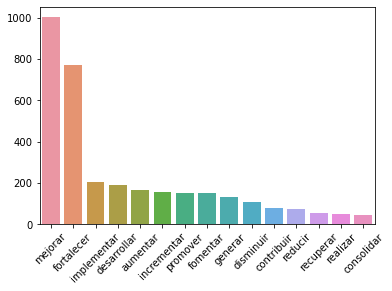

In [155]:
#Histograma de los verbos más frecuentes
freqdist = nltk.FreqDist(verbs)

#Se grafica las primeras 20 más comunes
all_fdist = freqdist.most_common(15)

#Se convierte a python series
all_fdist_serie = pd.Series(dict(all_fdist))

#Histograma de los verbos más comunes de los objetivos de los proyectos de inversión
#Histograma con valores absolutos
histograma_verbs = sns.barplot(x=all_fdist_serie.index, y=all_fdist_serie.values)
plt.xticks(rotation=45);

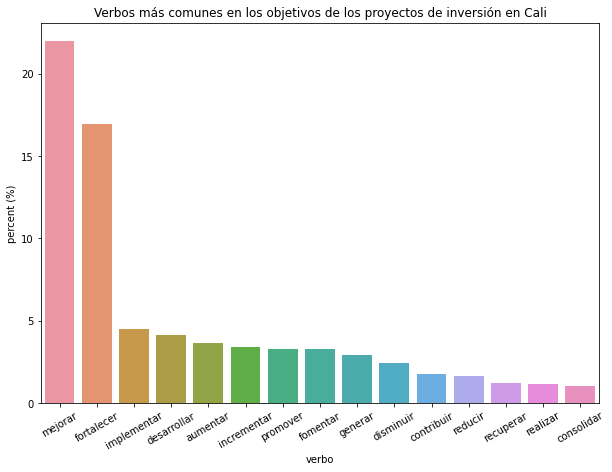

In [156]:
#Se crea la Serie enterior en formato DataFrame
verbo = []
cantidad = []
for i in all_fdist:
    verbo.append(i[0])
    cantidad.append(i[1])
    
histo_verbs_dict ={
    "verbo" : verbo,
    "cantidad" : cantidad
}

histo_verbs = pd.DataFrame(histo_verbs_dict)
histo_verbs["percent (%)"] = (histo_verbs["cantidad"]/4556)*100

#Histograma con porcentaje
fig = plt.figure(figsize =(10, 7))
histogram_verbs = sns.barplot(data = histo_verbs, x="verbo", y="percent (%)")
plt.title("Verbos más comunes en los objetivos de los proyectos de inversión en Cali")
plt.xticks(rotation=30);
plt.savefig("verbos_freq.jpg", bbox_inches='tight')
plt.savefig("verbos_freq.png", bbox_inches='tight')

In [157]:

            #Creación de nube de palabras más utilizadas en los objetivos de los proyectos
    
#Creación de la lista con las palabras de los objetivos (sin los verbos)
#Verbos sin repetir
verb_uni = list(pd.unique(verbs))

#Creación de una lista con todas las palbras de los objetivos de los proyectos
objetivos_split1 = []
objetivos_split = []

for i in objetivos:
    objetivos_split1.append(i.split())

for i in range(len(objetivos_split1)):
    for a in objetivos_split1[i]:
        objetivos_split.append(a)

#Se elimnina los verbos de la lista de objetivos        
objetivos_split = [w for w in objetivos_split if w not in verb_uni]

#Palabras no valiosas
palabras_no_int = ['cali', "santiago", "valle", "cauca", "municipio", "municipios"]

#Se eliminan palabras sin interés

objetivos_split = [w for w in objetivos_split if w not in palabras_no_int]

#Caracteres que no queremos 
string.punctuation
punctuation = string.punctuation + '–¡¿”“•\r´'

#Elimina signos de puntuación y otros caracteres indeseados
def no_punct(text):
    return re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´]+', '', text)

#Lista de objetivos sin puntuaciones
objetivos_no_punc = list(map(no_punct, objetivos_split))


# stopwords en español
stopwords_esp = stopwords.words('spanish')

#Lista de objetivos sin stopwords
objetivos_final = [w for w in objetivos_no_punc if w not in stopwords_esp]

objetivos_final = [w for w in objetivos_final if w not in palabras_no_int]

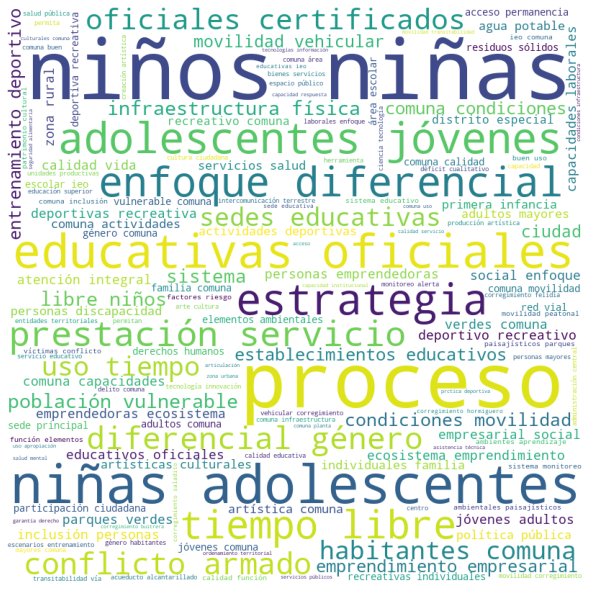

<Figure size 432x288 with 0 Axes>

In [46]:
                                        #Nube de palabras
#Palabras frecuentes
objetivos_final
texto_objetivo = " ".join(objetivos_final)
texto_objetivo

#Nube
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(texto_objetivo)
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.savefig("nube_palabras.jpg")
plt.savefig("nube_palabras.png")

In [158]:
#Proporción de los Estados de los Proyectos
#Usando la base datos_básicos

summary_estado_proy = data_basico.groupby(["EstadoProyecto"]).agg(
    mean_valor_total = ("ValorTotalProyecto", "mean"),
    mean_valor_pago = ("ValorPagoProyecto", "mean")
).reset_index()


#Cantidad de proyectos en cada estado
cant_estado = data_basico.groupby("EstadoProyecto").size().to_frame('n').reset_index()

summary_estado_proy = pd.merge(summary_estado_proy, cant_estado, how = "inner", on = "EstadoProyecto")

summary_estado_proy["mean_valor_total"] = summary_estado_proy["mean_valor_total"]/100000
summary_estado_proy["mean_valor_pago"] = summary_estado_proy["mean_valor_pago"]/100000

# Barras van a estar ordenadas
summary_estado_proy = summary_estado_proy.sort_values("mean_valor_total", ascending=False)
summary_estado_proy


,EstadoProyecto,mean_valor_total,mean_valor_pago,n
3,Formulación,249149.226707,0.000000,1551
2,En Ejecución,161984.546281,28811.639951,2753
1,Desaprobado,89865.179000,0.000000,5
5,Terminado,58078.995551,58078.995551,150
4,No Viable,46041.207543,0.000000,7
0,Aprobado,35044.104553,0.000000,6
6,Viable,16704.974514,0.000000,87


In [16]:
                                    #Grafico radar

# Values for the x axis
#ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(summary_estado_proy), endpoint=False)

# mean valor_total
#MEAN_VT = summary_estado_proy["mean_valor_total"].values

# Mean valor_pago
#MEAN_VP = summary_estado_proy["mean_valor_pago"].values

# label
#ESTADO = summary_estado_proy["EstadoProyecto"].values

# Número de proyectos por Estado
#CANTIDAD = summary_estado_proy["n"].values

In [16]:
                                        #Grafico
# Colors
COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]
GREY12 = "#1f1f1f"

#Tipo de letra
#plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

plt.rc("axes", unicode_minus=False)

#Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=CANTIDAD.min(), vmax=CANTIDAD.max())

# color scale 'cmap'
COLORS = cmap(norm(CANTIDAD))

# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-1500, 250000)

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, MEAN_VT, color=COLORS, alpha=0.9, width=0.52, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)



ax.set_xticks(ANGLES)
ax.set_xticklabels(ESTADO, size=12);

NameError: name 'CANTIDAD' is not defined

<AxesSubplot:title={'center':'Inversión promedio por estado del proyecto'}, xlabel='Estado del proyecto', ylabel='Inversión promedio'>

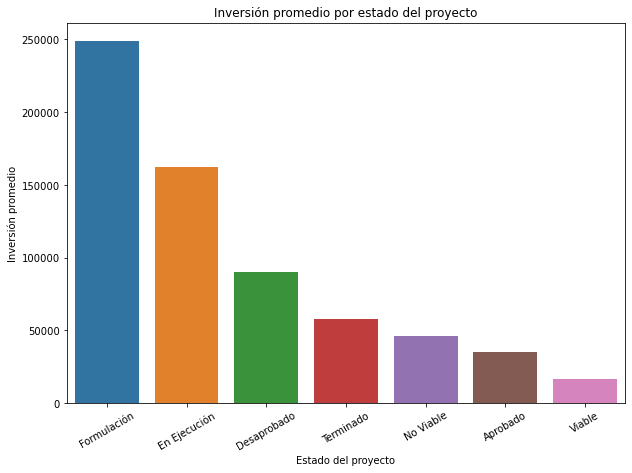

In [159]:
                                    #Gráfico de barras
fig = plt.figure(figsize =(10, 7))
inver_estado = sns.barplot(data = summary_estado_proy, x="EstadoProyecto", y="mean_valor_total")
plt.ylabel("Inversión promedio")
plt.xlabel("Estado del proyecto")
plt.title("Inversión promedio por estado del proyecto")
plt.xticks(rotation=30);
plt.savefig("inversion_estado.jpg", bbox_inches='tight')
plt.savefig("inversion_estado.png", bbox_inches='tight')
labels=None
inver_estado

In [131]:
summary_estado_proy

,EstadoProyecto,mean_valor_total,mean_valor_pago,n
3,Formulación,249149.226707,0.000000,1551
2,En Ejecución,161984.546281,28811.639951,2753
1,Desaprobado,89865.179000,0.000000,5
5,Terminado,58078.995551,58078.995551,150
4,No Viable,46041.207543,0.000000,7
0,Aprobado,35044.104553,0.000000,6
6,Viable,16704.974514,0.000000,87


In [160]:
#data_finan#codigo que puede servir:
#solo_cali = []
#for i in no_cali_list:
#    if i not in palabras_elmin:
#        solo_cali.append(i)
summary_estado_proy["proporcion"] = (summary_estado_proy["n"]/4559)*100


summary_estado_proy.loc[summary_estado_proy['n'] < 10, 'EstadoProyecto'] = 'Aprobado, Desaprobado, No viable'

summary_estado_proy = summary_estado_proy.groupby(["EstadoProyecto"]).agg(
    mean_valor_total = ("mean_valor_total", "mean"),
    mean_valor_pago = ("mean_valor_pago", "mean"),
    n = ("n", "sum"),
    proporcion = ("proporcion", "mean")
).reset_index()

summary_estado_proy

,EstadoProyecto,mean_valor_total,mean_valor_pago,n,proporcion
0,"Aprobado, Desaprobado, No viable",56983.497032,0.000000,18,0.131608
1,En Ejecución,161984.546281,28811.639951,2753,60.386050
2,Formulación,249149.226707,0.000000,1551,34.020619
3,Terminado,58078.995551,58078.995551,150,3.290195
4,Viable,16704.974514,0.000000,87,1.908313


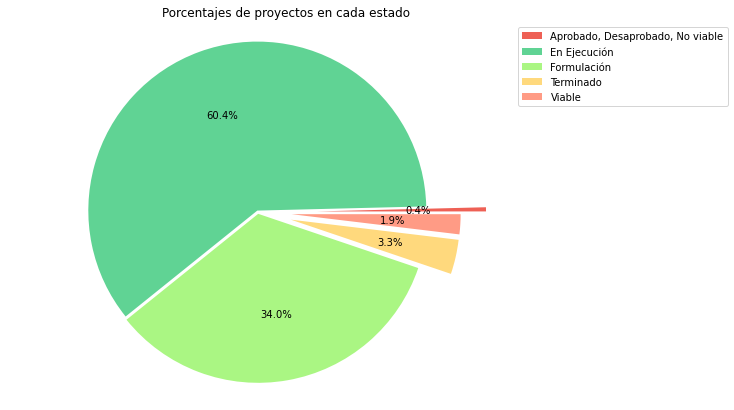

In [161]:
                        #Porcentaje de proyectos en cada estado
fig, ax=plt.subplots(figsize=(10,7))
colores=["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
explode = [0.35, 0.01, 0.01, 0.2, 0.2]
plt.pie(summary_estado_proy["n"], 
        #labels = summary_estado_proy["EstadoProyecto"],
        autopct = '%0.1f%%',
        colors=colores,
        explode = explode)
ax.legend(labels = summary_estado_proy["EstadoProyecto"], loc=1, bbox_to_anchor = (1.3,1))
plt.axis("equal")
plt.title("Porcentajes de proyectos en cada estado")
labels=None
plt.savefig("porcentaje_estado.jpg", bbox_inches='tight')
plt.savefig("porcentaje_estado.png", bbox_inches='tight')

In [162]:
            #Distribución de los valores de inversión según los sectores a que pertenecen
#Se reorganizan los sectores
sectores = pd.unique(data_basico["Sector"])
sectores = list(sectores)
data_basico["sector2"] = data_basico["Sector"]
data["sector2"] = data["Sector"]

sectores.remove('Transporte')
sectores.remove('Educación')
sectores.remove('Minas Y Energía')
sectores.remove('Trabajo')
sectores.remove('Comercio, Industria Y Turismo')
sectores.remove('Salud Y Protección Social')
sectores.remove('Información Estadística')
sectores.remove('Hacienda')
sectores.remove('Relaciones Exteriores')
sectores.remove('Registraduría')
sectores2 = sectores
sectores = pd.unique(data_basico["Sector"])
sectores = list(sectores)

for i in sectores:
    if i == "Vivienda, Ciudad Y Territorio":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Vivienda, Ciudad Y Territorio y planeación"
        data.loc[data.Sector == i, "sector2"] = "Vivienda, Ciudad Y Territorio y planeación"
    elif i == "Cultura":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Deporte, Recreación y Cultura"
        data.loc[data.Sector == i, "sector2"] = "Deporte, Recreación y Cultura"
    elif i == "Ambiente Y Desarrollo Sostenible":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Ambiente, Agricultiura Y Desarrollo Sostenible y rural"
        data.loc[data.Sector == i, "sector2"] = "Ambiente, Agricultiura Y Desarrollo Sostenible y rural"
    elif i == "Agricultura Y Desarrollo Rural":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Ambiente, Agricultiura Y Desarrollo Sostenible y rural"
        data.loc[data.Sector == i, "sector2"] = "Ambiente, Agricultiura Y Desarrollo Sostenible y rural"
    elif i == "Deporte Y Recreación":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Deporte, Recreación y Cultura"
        data.loc[data.Sector == i, "sector2"] = "Deporte, Recreación y Cultura"
    elif i == "Tecnologías De La Información Y Las Comunicaciones":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Tecnologías De La Información Y Las Comunicaciones y MINTIC"
        data.loc[data.Sector == i, "sector2"] = "Tecnologías De La Información Y Las Comunicaciones y MINTIC"
    elif i == "Inclusión Social Y Reconciliación":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Inclusión Social Y Reconciliación e Interior"
        data.loc[data.Sector == i, "sector2"] = "Inclusión Social Y Reconciliación e Interior"
    elif i == "Gobierno Territorial":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Presidencia, empleo público y gobierno territorial"
        data.loc[data.Sector == i, "sector2"] = "Presidencia, empleo público y gobierno territorial"
    elif i == "Ciencia, Tecnología E Innovación":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Tecnologías De La Información Y Las Comunicaciones y MINTIC"
        data.loc[data.Sector == i, "sector2"] = "Tecnologías De La Información Y Las Comunicaciones y MINTIC"
    elif i == "Justicia Y Del Derecho":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Congreso, Rama judicial y Justicia"
        data.loc[data.Sector == i, "sector2"] = "Congreso, Rama judicial y Justicia"
    elif i == "Interior":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Inclusión Social Y Reconciliación e Interior"
        data.loc[data.Sector == i, "sector2"] = "Inclusión Social Y Reconciliación e Interior"
    elif i == "Planeación":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Vivienda, Ciudad Y Territorio y planeación"
        data.loc[data.Sector == i, "sector2"] = "Vivienda, Ciudad Y Territorio y planeación"
    elif i == "Organismos De Control":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Fiscalía y Organismos De Control"
        data.loc[data.Sector == i, "sector2"] = "Fiscalía y Organismos De Control"
    elif i == "Empleo Público":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Presidencia, empleo público y gobierno territorial"
        data.loc[data.Sector == i, "sector2"] = "Presidencia, empleo público y gobierno territorial"
    elif i == "Congreso De La República":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Congreso, Rama judicial y Justicia"
        data.loc[data.Sector == i, "sector2"] = "Congreso, Rama judicial y Justicia"
    elif i == "Rama Judicial":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Congreso, Rama judicial y Justicia"
        data.loc[data.Sector == i, "sector2"] = "Congreso, Rama judicial y Justicia"
    elif i == "Presidencia De La República":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Presidencia, empleo público y gobierno territorial"
        data.loc[data.Sector == i, "sector2"] = "Presidencia, empleo público y gobierno territorial"
    elif i == "Fiscalía":
        data_basico.loc[data_basico.Sector == i, "sector2"] = "Fiscalía y Organismos De Control"
        data.loc[data.Sector == i, "sector2"] = "Fiscalía y Organismos De Control"
        

In [163]:
                #Se agrega el promedio del valor de las inversiones por sector
data_basico['ValorTotalProyecto'] = data_basico['ValorTotalProyecto']/100000
data_basico['Log_ValorTotalProyecto'] = np.log(data_basico['ValorTotalProyecto'])
#Se halla el promedio de inversión por grupo
prom_inver= data_basico.groupby(["sector2"])['ValorTotalProyecto'].mean()
#Se crea una variable con los datos anteriores
data_basico['prom_inver'] = data_basico['sector2'].map(prom_inver)


C:\Users\johan\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



In [26]:
pru = ['Vivienda, Ciudad Y Territorio y planeación', 'Deporte, Recreación y Cultura', 'Educación', 'Congreso, Rama judicial y Justicia', 'Hacienda']

data_basico2 = data_basico
for i in pru:
    data_basico2 = data_basico2.drop(data_basico2[data_basico2['sector2'] == i].index)

In [164]:
#Merge con el dataframe anterior
data_basico["EstadoProyecto2"] = data_basico["EstadoProyecto"]
data_basico.loc[data_basico.EstadoProyecto2 == "Aprobado", "EstadoProyecto2"] = 'Aprobado, Desaprobado, No viable'
data_basico.loc[data_basico.EstadoProyecto2 == "Desaprobado", "EstadoProyecto2"] = 'Aprobado, Desaprobado, No viable'
data_basico.loc[data_basico.EstadoProyecto2 == "No viable", "EstadoProyecto2"] = 'Aprobado, Desaprobado, No viable'
data_basico


,Bpin,NombreProyecto,ObjetivoGeneral,EstadoProyecto,Horizonte,Sector,EntidadResponsable,ProgramaPresupuestal,TipoProyecto,PlanDesarrolloNacional,ValorTotalProyecto,ValorVigenteProyecto,ValorObligacionProyecto,ValorPagoProyecto,SubEstadoProyecto,CodigoEntidadResponsable,sector2,Log_ValorTotalProyecto,prom_inver,EstadoProyecto2
11063,2.022321e+13,Fortalecimiento De La Participación Comunitari...,Fortalecer la apropiación y procesos de partic...,Formulación,2022-2022,Ambiente Y Desarrollo Sostenible,corporación autónoma regional del valle del ca...,3202 CONSERVACIÓN DE LA BIODIVERSIDAD Y SUS SE...,Sgr,"Pacto Por Colombia, Pacto por la Equidad (2019...",492.54000,0.000000e+00,0.000000e+00,0.000000e+00,Devuelto a MGA,320700,"Ambiente, Agricultiura Y Desarrollo Sostenible...",6.199576,75784.948585,Formulación
44679,2.022320e+13,Restauración De Corredores De Conectividad Del...,Restaurar áreas degradadas asociadas a la vuln...,Aprobado,2022-2023,Ambiente Y Desarrollo Sostenible,valledelcauca,3206 GESTIÓN DEL CAMBIO CLIMÁTICO PARA UN DESA...,Sgr,NaN,42527.40847,4.252741e+09,0.000000e+00,0.000000e+00,Sin contratar (SGR),75005,"Ambiente, Agricultiura Y Desarrollo Sostenible...",10.657904,75784.948585,"Aprobado, Desaprobado, No viable"
30416,2.022130e+13,Mejoramiento Y Obras Complementarias De La Vía...,Mejorar la comunicación de de la vía terciaria...,Formulación,2022-2023,Transporte,valledelcauca,2402 INFRAESTRUCTURA RED VIAL REGIONAL,Sgr,"Pacto Por Colombia, Pacto por la Equidad (2019...",304641.56259,0.000000e+00,0.000000e+00,0.000000e+00,Devuelto a MGA,75005,Transporte,12.626891,279970.101808,Formulación
60330,2.021130e+13,Fortalecimiento De Procesos Culturales Y Depor...,Fortalecer los procesos culturales y deportivo...,Formulación,2021-2021,Cultura,valledelcauca,3301 PROMOCIÓN Y ACCESO EFECTIVO A PROCESOS CU...,Sgr,"Pacto Por Colombia, Pacto por la Equidad (2019...",35118.94892,0.000000e+00,0.000000e+00,0.000000e+00,En proceso de viabilidad,75005,"Deporte, Recreación y Cultura",10.466496,76820.915670,Formulación
48963,2.021130e+13,Optimización Del Sistema Del Alcantarillado Sa...,Mejorar la disposicion de las aguas residuales...,Formulación,2021-2021,"Vivienda, Ciudad Y Territorio",valledelcauca,4003 ACCESO DE LA POBLACIÓN A LOS SERVICIOS DE...,Sgr,"Pacto Por Colombia, Pacto por la Equidad (2019...",35144.82976,0.000000e+00,0.000000e+00,0.000000e+00,En proceso de viabilidad,75005,"Vivienda, Ciudad Y Territorio y planeación",10.467233,156669.735278,Formulación
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57235,2.012000e+12,Construcción De Proyectos De Infraestructura E...,PROPICIAR QUE LAS VIVIENDAS EXISTENTES CUMPLAN...,Terminado,2012-2017,Minas Y Energía,departamento del valle del cauca,0111 CONSTRUCCION DE INFRAESTRUCTURA PROPIA DE...,Sgr,Prosperidad para Todos (2010-2014),5144.60946,3.429740e+08,0.000000e+00,5.144609e+08,Cerrado (SGR),73298,Minas Y Energía,8.545705,950710.311742,Terminado
36900,2.012000e+12,Estudios Y Diseños Para La Rehabilitacion De L...,REALIZAR LOS ESTUDIOS Y DISEÑOS PARA LA REHABI...,Terminado,2012-2013,Transporte,departamento del valle del cauca,0420 ESTUDIOS DE PREINVERSION,Sgr,Prosperidad para Todos (2010-2014),8575.09468,8.581970e+08,0.000000e+00,8.575095e+08,Cerrado (SGR),73298,Transporte,9.056617,279970.101808,Terminado
37603,2.012000e+12,Mantenimiento Mejoramiento De Las Vias Del Pai...,MEJORAR LA CONECTIVIDAD Y MOVILIDAD DE LAS VIA...,Terminado,2012-2015,Transporte,departamento del valle del cauca,0113 MEJORAMIENTO Y MANTENIMIENTO DE INFRAESTR...,Sgr,Prosperidad para Todos (2010-2014),29312.39418,3.007956e+09,0.000000e+00,2.931239e+09,Cerrado (SGR),73298,Transporte,10.285766,279970.101808,Terminado
280521,2.011011e+12,Adquisición Bien Inmueble Para El Funcionamien...,DISMINUIR EL HACINAMIENTO DE LA COMUNIDAD IN...,Viable,2011-2012,Educación,instituto tecnico nacional de comercio simon r...,0112 ADQUISICION DE INFRAESTRUCTURA PROPIA DEL...,Pgn,Todos por un nuev

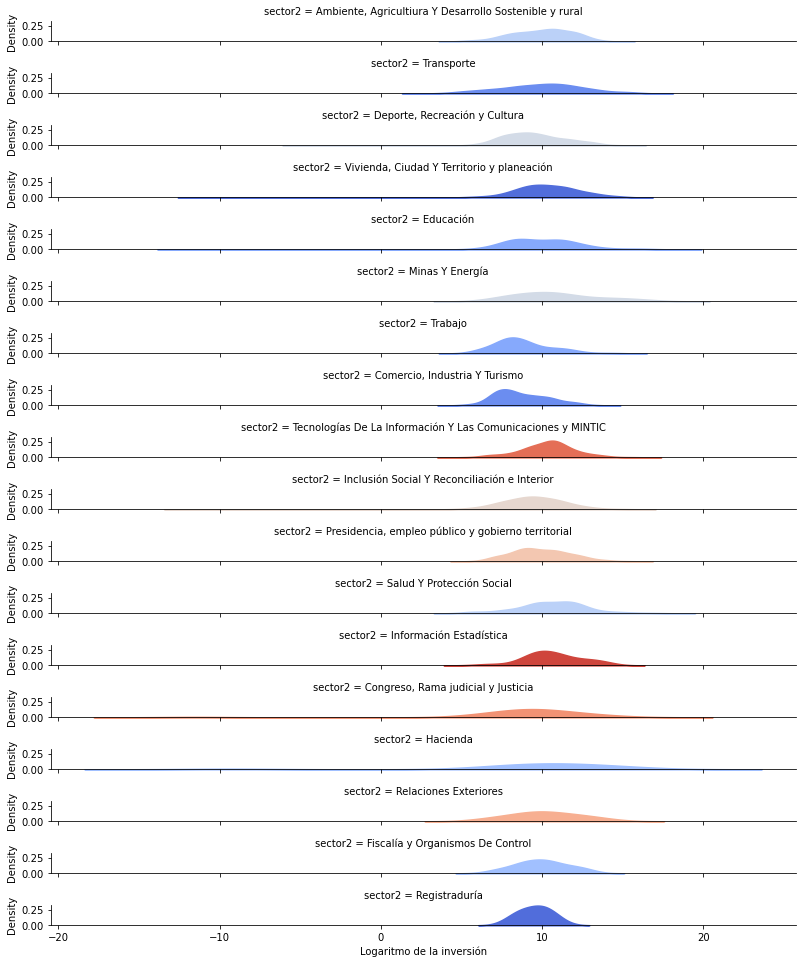

In [87]:
        #Gráfico de la distribución de los valores de inversión según los sectores a que pertenecen
#Paleta de colores
pal = sns.color_palette(palette='coolwarm', n_colors=12)
g = sns.FacetGrid(data_basico, row='sector2', hue='prom_inver', aspect=15, height=0.75, palette=pal)

# we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Log_ValorTotalProyecto',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.set_axis_labels("Logaritmo de la inversión",)
labels=None
plt.savefig("distribucion_sector.jpg")
plt.savefig("distribucion_sector.png")


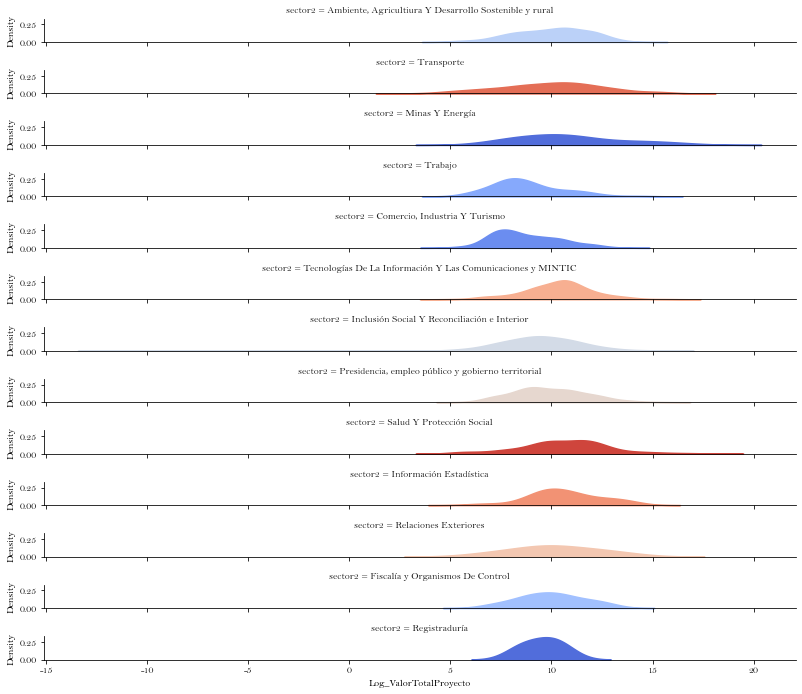

In [27]:
        #Gráfico de la distribución de los valores de inversión según los sectores a que pertenecen
#Paleta de colores
pal = sns.color_palette(palette='coolwarm', n_colors=12)
g = sns.FacetGrid(data_basico2, row='sector2', hue='prom_inver', aspect=15, height=0.75, palette=pal)

# we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Log_ValorTotalProyecto',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

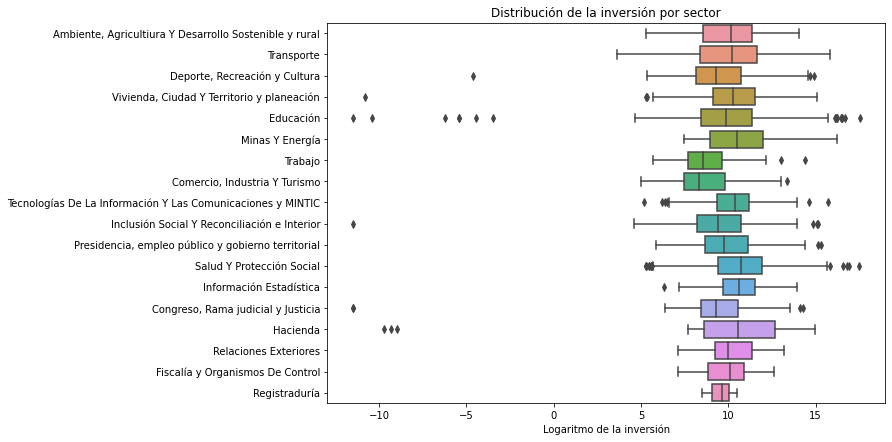

In [165]:
fig = plt.figure(figsize =(10, 7))
sns.boxplot(data=data_basico, x="Log_ValorTotalProyecto", y="sector2")
plt.xlabel("Logaritmo de la inversión",)
plt.ylabel("")
plt.title("Distribución de la inversión por sector")
labels=None
plt.savefig("distribucion_sector2.jpg", bbox_inches='tight')
plt.savefig("distribucion_sector2.png",bbox_inches='tight')

In [166]:
#Inversión promedio para cada sector (Media sin corregir por outliers)
data_inver_mean = data_basico.groupby(["sector2"]).agg(
    mean_valor_total = ("ValorTotalProyecto", "mean")).reset_index()

data_inver_mean = data_inver_mean.sort_values("mean_valor_total", ascending=False)

#Inversión promedio para cada sector (Media corregiendo por outliers)
lista_sector = list(pd.unique((data_basico["sector2"])))
dic_inver_mean = {}

#Se crea diccionario que almacena el promedio truncado para sector
for i in lista_sector:
    a = data_basico[data_basico.sector2 == i]
    b = stats.trim_mean(a['ValorTotalProyecto'], .10)
    dic_inver_mean[i] = b

#Se convierte el diccionario a dataframe
inver_mean = pd.DataFrame([[key, dic_inver_mean[key]] for key in dic_inver_mean.keys()], columns=['sector', 'media_corregida'])
inver_mean = inver_mean.sort_values("media_corregida", ascending=False)
inver_mean

,sector,media_corregida
5,Minas Y Energía,407993.094246
14,Hacienda,249825.668279
15,Relaciones Exteriores,115073.095982
12,Información Estadística,84322.790374
11,Salud Y Protección Social,83402.126919
1,Transporte,69107.957079
3,"Vivienda, Ciudad Y Territorio y planeación",60940.385979
8,Tecnologías De La Información Y Las Comunicaci...,48807.103333
4,Educación,48686.288558
0,"Ambiente, Agricultiura Y Desarrollo Sostenible...",47665.172518


<AxesSubplot:title={'center':'Promedio de la inversión por sector'}, xlabel='Inversión promedio (Media truncada)'>

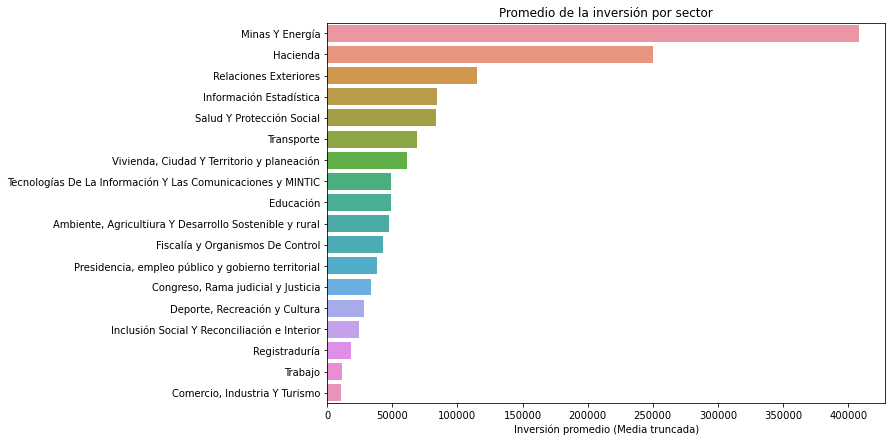

In [167]:
#Gráfico de la media corregida
fig = plt.figure(figsize =(10, 7))
media_sector_correg = sns.barplot(data = inver_mean, y="sector", x="media_corregida")
plt.xlabel("Inversión promedio (Media truncada)",)
plt.ylabel("")
plt.title("Promedio de la inversión por sector")
labels=None
plt.savefig("media_inver_sector.jpg", bbox_inches='tight')
plt.savefig("media_inver_sector.png", bbox_inches='tight')
media_sector_correg

In [168]:
#Cantidad de proyectos por sector
cant_proyecto = data_basico.groupby("sector2").size().to_frame('n').reset_index()
cant_proyecto = cant_proyecto.sort_values("n", ascending=False)

<AxesSubplot:title={'center':'Cantidad de proyectos por sector'}, xlabel='Cantidad'>

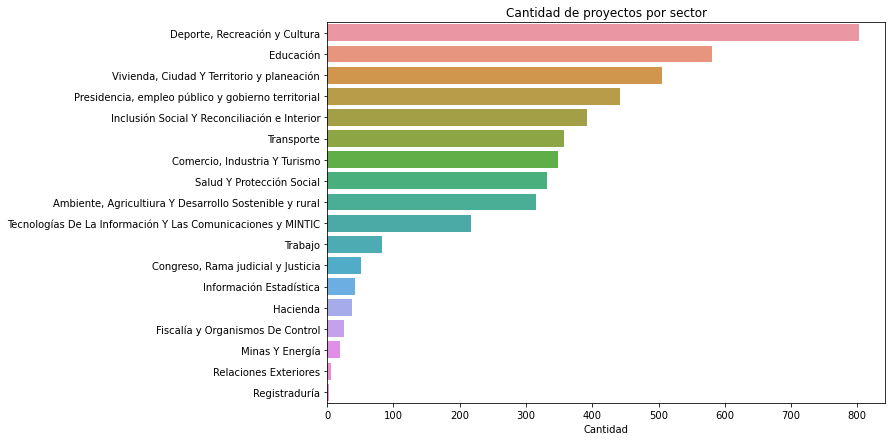

In [170]:
#Gráfica
fig = plt.figure(figsize =(10, 7))
cant_proy_sector = sns.barplot(data = cant_proyecto, y="sector2", x="n")
plt.xlabel("Cantidad",)
plt.ylabel("")
plt.title("Cantidad de proyectos por sector")
labels=None
plt.savefig("cantidad_sector.jpg", bbox_inches='tight')
plt.savefig("cantidad_sector.png", bbox_inches='tight')
cant_proy_sector

In [171]:
cant_proyecto["porcentaje_total"] = (cant_proyecto["n"]/4559)*100
cant_proyecto

,sector2,n,porcentaje_total
3,"Deporte, Recreación y Cultura",802,17.591577
4,Educación,580,12.722088
17,"Vivienda, Ciudad Y Territorio y planeación",506,11.098925
10,"Presidencia, empleo público y gobierno territo...",442,9.695109
7,Inclusión Social Y Reconciliación e Interior,392,8.598377
16,Transporte,358,7.852599
1,"Comercio, Industria Y Turismo",348,7.633253
13,Salud Y Protección Social,332,7.282299
0,"Ambiente, Agricultiura Y Desarrollo Sostenible...",315,6.909410
14,Tecnologías De La Información Y Las Comunicaci...,217,4.759816


In [172]:
data_basico = pd.merge(data_basico, cant_proyecto, how = "inner", on = "sector2")
data_basico

,Bpin,NombreProyecto,ObjetivoGeneral,EstadoProyecto,Horizonte,Sector,EntidadResponsable,ProgramaPresupuestal,TipoProyecto,PlanDesarrolloNacional,...,ValorObligacionProyecto,ValorPagoProyecto,SubEstadoProyecto,CodigoEntidadResponsable,sector2,Log_ValorTotalProyecto,prom_inver,EstadoProyecto2,n,porcentaje_total
0,2.022321e+13,Fortalecimiento De La Participación Comunitari...,Fortalecer la apropiación y procesos de partic...,Formulación,2022-2022,Ambiente Y Desarrollo Sostenible,corporación autónoma regional del valle del ca...,3202 CONSERVACIÓN DE LA BIODIVERSIDAD Y SUS SE...,Sgr,"Pacto Por Colombia, Pacto por la Equidad (2019...",...,0.0,0.000000e+00,Devuelto a MGA,320700,"Ambiente, Agricultiura Y Desarrollo Sostenible...",6.199576,75784.948585,Formulación,315,6.909410
1,2.022320e+13,Restauración De Corredores De Conectividad Del...,Restaurar áreas degradadas asociadas a la vuln...,Aprobado,2022-2023,Ambiente Y Desarrollo Sostenible,valledelcauca,3206 GESTIÓN DEL CAMBIO CLIMÁTICO PARA UN DESA...,Sgr,NaN,...,0.0,0.000000e+00,Sin contratar (SGR),75005,"Ambiente, Agricultiura Y Desarrollo Sostenible...",10.657904,75784.948585,"Aprobado, Desaprobado, No viable",315,6.909410
2,2.021130e+13,Incremento De La Producción De Aguacate Hass Y...,INCREMENTAR LA PRODUCCIÓN DE AGUACATE HASS Y L...,En Ejecución,2021-2021,Agricultura Y Desarrollo Rural,corporacion para el desarrollo social y cultur...,1702 INCLUSIÓN PRODUCTIVA DE PEQUEÑOS PRODUCTO...,Sgr,NaN,...,0.0,4.697786e+09,Contratado en ejecución (SGR),800182554,"Ambiente, Agricultiura Y Desarrollo Sostenible...",11.927799,75784.948585,En Ejecución,315,6.909410
3,2.021130e+13,Elaboración De Estudios Y Diseños De Prefactib...,Incrementar la productividad en el sector de l...,Formulación,2022-2022,Agricultura Y Desarrollo Rural,valle - planeación,1709 INFRAESTRUCTURA PRODUCTIVA Y COMERCIALIZA...,T,"Pacto Por Colombia, Pacto por la Equidad (2019...",...,0.0,0.000000e+00,En proceso de viabilidad,0376,"Ambiente, Agricultiura Y Desarrollo Sostenible...",10.760485,75784.948585,Formulación,315,6.909410
4,2.020130e+13,Estudios Y Diseños Para La Creación Del Comple...,Incrementar el desarrollo técnico y productivo...,Formulación,2020-2020,Agricultura Y Desarrollo Rural,valledelcauca,1799 FORTALECIMIENTO DE LA GESTIÓN Y DIRECCIÓN...,Sgr,"Pacto Por Colombia, Pacto por la Equidad (2019...",...,0.0,0.000000e+00,Devuelto a MGA,75005,"Ambiente, Agricultiura Y Desarrollo Sostenible...",10.370365,75784.948585,Formulación,315,6.909410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4554,2.017004e+12,Fortalecimiento De La Cultura Del Control Inte...,Fortalecer la Cultura del Control Interno en l...,En Ejecución,2016-2019,Organismos De Control,valle - planeación,2599 FORTALECIMIENTO DE LA GESTIÓN Y DIRECCIÓN...,T,Todos por un nuevo país (2014-2018),...,0.0,0.000000e+00,"Inactivo (PGN, Territorio)",376,Fiscalía y Organismos De Control,9.920345,60342.125697,En Ejecución,25,0.548366
4555,2.017004e+12,Fortalecimiento Institucional De La Oficina De...,Fortalecer institucionalmente la Oficina de Co...,En Ejecución,2016-2019,Organismos De Control,valle - planeación,2599 FORTALECIMIENTO DE LA GESTIÓN Y DIRECCIÓN...,T,Todos por un nuevo país (2014-2018),...,0.0,0.000000e+00,"Inactivo (PGN, Territorio)",0376,Fiscalía y Organismos De Control,8.857411,60342.125697,En Ejecución,25,0.548366
4556,2.019004e+12,Implementación De Estrategias Para El Seguimie...,Fortalecimiento en la organización de la jorna...,En Ejecución,2019-2019,Registraduría,valle - planeación,2801 PROCESOS DEMOCRÁTICOS Y ASUNTOS ELECTORALES,T,Todos por un nuevo país (2014-2018),...,0.0,0.000000e+00,"Inactivo (PGN, Territorio)",376,Registraduría,9.615805,18595.600000,En Ejecución,3,0.065804
4557,2.018766e+12,Fortalecimiento Y Elección De Dignatario De Gr...,Fortalecer la elección de dignatarios de grupo...,Formulación,2016-2019,Registraduría,riofríovalle del cauca,0,T,NaN,...,0.0,0.000000e+00,Devuelto a MGA,76616,Re

In [173]:
                    #Para cada sector se analiza el % que está aprobado, en formulación, en ejecución etc.
sectores_data = list(pd.unique(data_basico.sector2))
estados_proy = list(pd.unique(data_basico.EstadoProyecto))
data_sector_estado = pd.DataFrame()

for a in sectores_data:
    summary_sector_estado =  data_basico.loc[data_basico['sector2'] == a]
    print(a)
    summary_sector_estado = summary_sector_estado.groupby(["EstadoProyecto"]).agg(
        sum_estado = ("EstadoProyecto", "count"),
    ).reset_index()
    
    data_estado = []
    for i in estados_proy:
        if i not in list(pd.unique(summary_sector_estado.EstadoProyecto)):
            data_estado.append(i)
            summary_sector_estado = summary_sector_estado.append({"EstadoProyecto":i}, ignore_index=True)
            summary_sector_estado["sector2"] = a
            
    data_sector_estado = data_sector_estado.append(summary_sector_estado, ignore_index=True)
data_sector_estado
#Se cambian NAN por 0
data_sector_estado.replace(to_replace= np.nan, value = 0, inplace=True )

Ambiente, Agricultiura Y Desarrollo Sostenible y rural
Transporte
Deporte, Recreación y Cultura


C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

Vivienda, Ciudad Y Territorio y planeación
Educación
Minas Y Energía


C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

Trabajo
Comercio, Industria Y Turismo


C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

Tecnologías De La Información Y Las Comunicaciones y MINTIC
Inclusión Social Y Reconciliación e Interior


C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

Presidencia, empleo público y gobierno territorial
Salud Y Protección Social
Información Estadística


C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

Congreso, Rama judicial y Justicia
Hacienda


C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

Relaciones Exteriores
Fiscalía y Organismos De Control

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co


Registraduría


C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\AppData\Local\Temp\ipykernel_17140\3259398603.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

In [175]:
#Se hace merge con la base que tiene la cantidad de proyectos por sector
data_sector_estado = pd.merge(data_sector_estado, cant_proyecto, how = "inner", on = "sector2")
data_sector_estado["porcentaje"] = (data_sector_estado["sum_estado"]/data_sector_estado["n"])*100
data_sector_estado

,EstadoProyecto,sum_estado,sector2,n,porcentaje_total,porcentaje
0,Aprobado,2.0,"Ambiente, Agricultiura Y Desarrollo Sostenible...",315,6.909410,0.634921
1,En Ejecución,155.0,"Ambiente, Agricultiura Y Desarrollo Sostenible...",315,6.909410,49.206349
2,Formulación,138.0,"Ambiente, Agricultiura Y Desarrollo Sostenible...",315,6.909410,43.809524
3,No Viable,1.0,"Ambiente, Agricultiura Y Desarrollo Sostenible...",315,6.909410,0.317460
4,Terminado,17.0,"Ambiente, Agricultiura Y Desarrollo Sostenible...",315,6.909410,5.396825
...,...,...,...,...,...,...
114,Aprobado,0.0,Registraduría,3,0.065804,0.000000
115,Viable,0.0,Registraduría,3,0.065804,0.000000
116,Terminado,0.0,Registraduría,3,0.065804,0.000000
117,No Viable,0.0,Registraduría,3,0.065804,0.000000


C:\Users\johan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\johan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\johan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



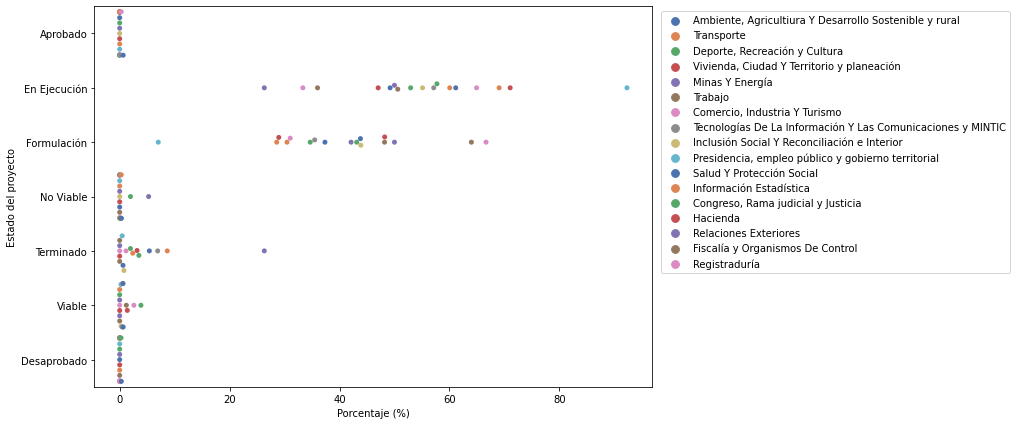

In [176]:
                                                    #swarmplot

fig, ax=plt.subplots(figsize=(10,7))
sns.swarmplot(data=data_sector_estado, x="porcentaje", y="EstadoProyecto", hue="sector2", palette="deep")
ax.legend(loc=1, bbox_to_anchor = (1.65,1))
ax.set(xlabel='Porcentaje (%)', ylabel='Estado del proyecto')
plt.savefig("swarmplot_estado.jpg", bbox_inches='tight')
plt.savefig("swarmplot_estado.png", bbox_inches='tight')


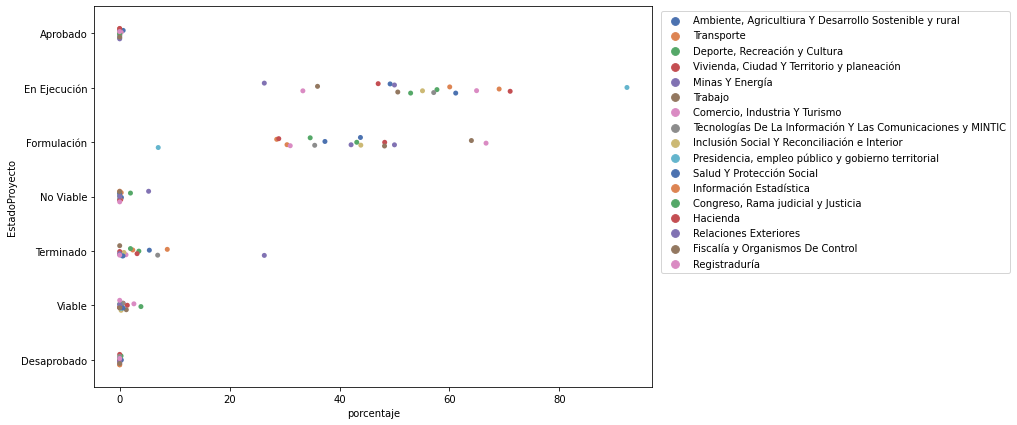

In [177]:
                                                    #stripplot

fig, ax=plt.subplots(figsize=(10,7))
sns.stripplot(data=data_sector_estado, x="porcentaje", y="EstadoProyecto", hue="sector2", palette="deep")
ax.legend(loc=1, bbox_to_anchor = (1.65,1))


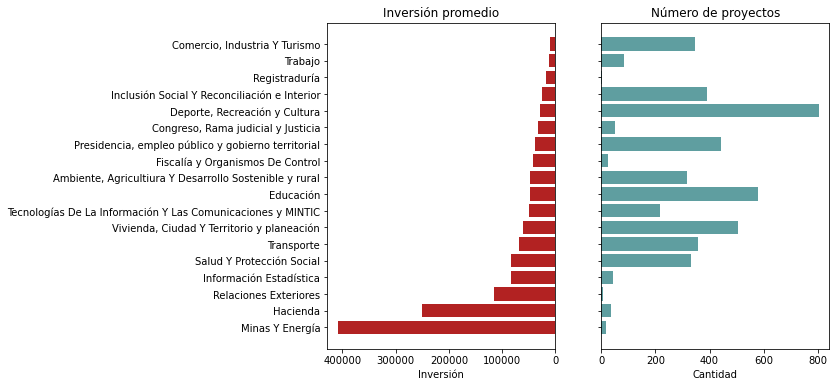

In [178]:
#Inversión promedio para cada proyecto y número de proyectos por sector

inver_cant = pd.merge(inver_mean, cant_proyecto, how = "inner", left_on= "sector", right_on="sector2")
inver_cant = inver_cant.drop(['sector2'], axis=1)

#definir límites para x and y
y = range(0, len(inver_cant))
x_media = inver_cant['media_corregida']
x_cantidad = inver_cant['n']

#define los parámetros de la trama
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#definir barras masculinas y femeninas
axes[0].barh(y, x_media, align='center', color='firebrick')
axes[0].set(title='Inversión promedio')
axes[1].barh(y, x_cantidad, align='center', color='cadetblue')
axes[1].set(title='Número de proyectos')
axes[0].set(xlabel = "Inversión")
axes[1].set(xlabel = "Cantidad")

# ajuste los parámetros de la cuadrícula y especifique etiquetas para el eje y
#axes[1].grid()
axes[0].set(yticks=y, yticklabels=inver_cant['sector'])
axes[0].invert_xaxis()
#axes[0].grid()

#display plot 

plt.savefig("Barras_prom_cant.jpg", bbox_inches='tight')
plt.savefig("Barras_prom_cant.png", bbox_inches='tight')
plt.show()


In [179]:
#De los poryectos terminados, ver el porcentaje a que pertence cada sector. (Para ver si hay sectores que reciben más atención que otros)

#Base de los proyectos terminados.
terminados = data_basico.loc[data_basico['EstadoProyecto'] == "Terminado" ]

cant_proy_term = terminados.groupby("sector2").size().to_frame('n').reset_index()
cant_proy_term = cant_proy_term.sort_values("n", ascending=False)
cant_proy_term = cant_proy_term.rename(columns={'n': 'n_terminados'})
cant_proy_term = pd.merge(cant_proyecto, cant_proy_term, how = "outer", on = "sector2")
cant_proy_term = cant_proy_term.rename(columns={'n': 'n_total'})
#Porcentaje de proyectos terminados
cant_proy_term["Porcentaje_terminados"] = (cant_proy_term["n_terminados"]/cant_proy_term["n_total"])*100

#Se cambian NAN por 0
cant_proy_term.replace(to_replace= np.nan, value = 0, inplace=True )

cant_proy_term = cant_proy_term.sort_values("Porcentaje_terminados", ascending=False)

<AxesSubplot:title={'center':'Porcentaje de proyectos terminados'}, xlabel='Porcentaje (%)', ylabel='Sector'>

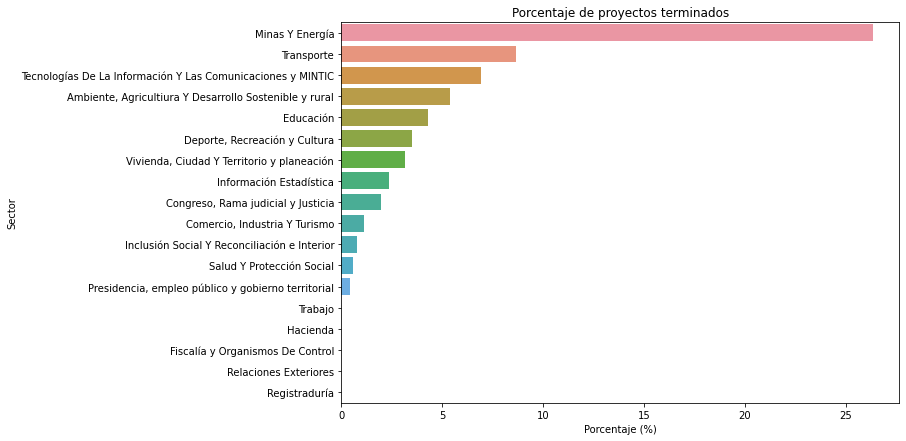

In [180]:
fig = plt.figure(figsize =(10, 7))
proyectos_termina = sns.barplot(data = cant_proy_term, y="sector2", x="Porcentaje_terminados")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Sector")
plt.title("Porcentaje de proyectos terminados")
labels=None
plt.savefig("proy_terminados.jpg", bbox_inches='tight')
plt.savefig("proy_terminados.png", bbox_inches='tight')
proyectos_termina

In [181]:
                                            #Fuentedefinanciación
#Fuentedefinanciación = pd.unique(data_basico["Fuentedefinanciación"])
#Se eliminan los códigos Bpin repetidos
data2 = data.drop_duplicates(subset=['Bpin'])
#data_finan2 = data_finan2.sort_values("Porcentaje_terminados", ascending=False)

data2['ValorTotalProyecto'] = data2['ValorTotalProyecto']/100000

#Se agrega la cantidad de proyectos que tiene cada sector
data2 = pd.merge(data2, cant_proyecto, how = "inner", on = "sector2")
data2


C:\Users\johan\AppData\Local\Temp\ipykernel_17140\1136048129.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Bpin,ObjetivoGeneral,EstadoProyecto,ProgramaPresupuestal,TipoProyecto,PlanDesarrolloNacional,ValorTotalProyecto,ValorVigenteProyecto,ValorObligacionProyecto,ValorPagoProyecto,...,ValorObligado,ValorPagado,EntidadResponsable,TipoEntidadFuenteFinanciacion,CodigoEntidadFuenteFinanciacion,EntidadFuenteFinanciacion,TipoRecursoFuenteFinanciacion,sector2,n,porcentaje_total
0,2.022321e+13,Fortalecer la apropiación y procesos de partic...,Formulación,3202 CONSERVACIÓN DE LA BIODIVERSIDAD Y SUS SE...,Sgr,"Pacto Por Colombia, Pacto por la Equidad (2019...",492.54000,0.000000e+00,0.0,0.000000e+00,...,0.0,0.000000e+00,corporación autónoma regional del valle del ca...,Entidades Presupuesto Nacional - PGN,320700,Corporación Autónoma Regional del Valle del Ca...,PGN - Nación - Inversión,"Ambiente, Agricultiura Y Desarrollo Sostenible...",315,6.909410
1,2.022320e+13,Restaurar áreas degradadas asociadas a la vuln...,Aprobado,3206 GESTIÓN DEL CAMBIO CLIMÁTICO PARA UN DESA...,Sgr,NaN,42527.40847,4.252741e+09,0.0,0.000000e+00,...,0.0,0.000000e+00,valledelcauca,Departamento,75005,Valledelcauca,Propios territorio,"Ambiente, Agricultiura Y Desarrollo Sostenible...",315,6.909410
2,2.021130e+13,INCREMENTAR LA PRODUCCIÓN DE AGUACATE HASS Y L...,En Ejecución,1702 INCLUSIÓN PRODUCTIVA DE PEQUEÑOS PRODUCTO...,Sgr,NaN,151417.92095,1.514179e+10,0.0,4.697786e+09,...,0.0,4.697786e+09,corporacion para el desarrollo social y cultur...,Municipio,52256,"El Rosario,Nariño",SGR - Asignación para la paz,"Ambiente, Agricultiura Y Desarrollo Sostenible...",315,6.909410
3,2.021130e+13,Incrementar la productividad en el sector de l...,Formulación,1709 INFRAESTRUCTURA PRODUCTIVA Y COMERCIALIZA...,T,"Pacto Por Colombia, Pacto por la Equidad (2019...",47121.53693,0.000000e+00,0.0,0.000000e+00,...,0.0,0.000000e+00,valle - planeación,Departamento,77608,Buenaventura,Propios territorio,"Ambiente, Agricultiura Y Desarrollo Sostenible...",315,6.909410
4,2.020130e+13,Incrementar el desarrollo técnico y productivo...,Formulación,1799 FORTALECIMIENTO DE LA GESTIÓN Y DIRECCIÓN...,Sgr,"Pacto Por Colombia, Pacto por la Equidad (2019...",31900.10559,0.000000e+00,0.0,0.000000e+00,...,0.0,0.000000e+00,valledelcauca,Departamento,75005,Valledelcauca,Asignación para la Paz,"Ambiente, Agricultiura Y Desarrollo Sostenible...",315,6.909410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4551,2.017004e+12,Fortalecer la Cultura del Control Interno en l...,En Ejecución,2599 FORTALECIMIENTO DE LA GESTIÓN Y DIRECCIÓN...,T,Todos por un nuevo país (2014-2018),20340.00000,2.034000e+09,0.0,0.000000e+00,...,0.0,0.000000e+00,valle - planeación,Departamento,75005,Valledelcauca,Propios territorio,Fiscalía y Organismos De Control,25,0.548366
4552,2.017004e+12,Fortalecer institucionalmente la Oficina de Co...,En Ejecución,2599 FORTALECIMIENTO DE LA GESTIÓN Y DIRECCIÓN...,T,Todos por un nuevo país (2014-2018),7026.26665,7.026267e+08,0.0,0.000000e+00,...,0.0,0.000000e+00,valle - planeación,Departamento,27,Chocó,Propios territorio,Fiscalía y Organismos De Control,25,0.548366
4553,2.019004e+12,Fortalecimiento en la organización de la jorna...,En Ejecución,2801 PROCESOS DEMOCRÁTICOS Y ASUNTOS ELECTORALES,T,Todos por un nuevo país (2014-2018),15000.00000,1.500000e+09,0.0,0.000000e+00,...,0.0,0.000000e+00,valle - planeación,Departamento,75005,Valledelcauca,Propios territorio,Registraduría,3,0.065804
4554,2.018766e+12,Fortalecer la elección de dignatarios de grupo...,Formulación,0,T,NaN,4786.80000,0.000000e+00,0.0,0.000000e+00,...,0.0,0.000000e+00,riofríovalle del cauca,Municipio,76616,"Riofrío,Valle del Cauca",Propios territorio,Registraduría,3,0.065804


<AxesSubplot:title={'center':'Tipos de fuentes de financiación'}, xlabel='Porcentaje (%)', ylabel='Fuentes de financiación'>

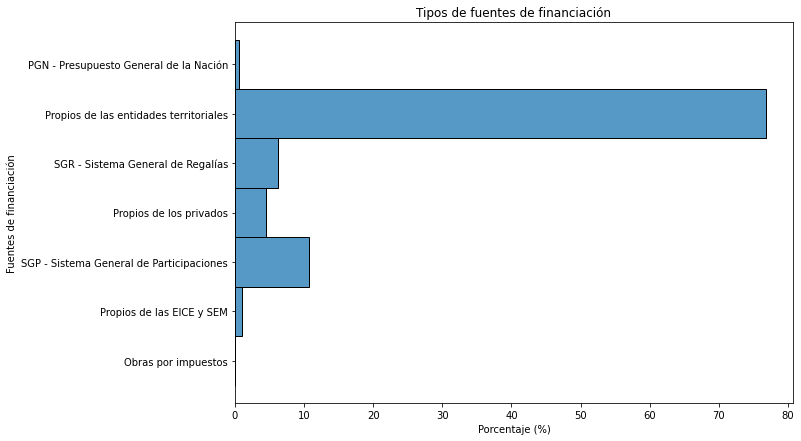

In [182]:
fig = plt.figure(figsize =(10, 7))

fuentes_finan = sns.histplot(data=data2, y = "Fuentedefinanciación", stat="percent")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Fuentes de financiación")
plt.title("Tipos de fuentes de financiación")
labels=None
plt.savefig("fuentes_finan.jpg", bbox_inches='tight')
plt.savefig("fuentes_finan.png",bbox_inches='tight')
fuentes_finan

In [145]:
fig = px.treemap(data2, path=[px.Constant("Fuentes de financiación"), 'Fuentedefinanciación', 'sector2'], values='ValorTotalProyecto',
                color = "porcentaje_total",
                color_continuous_scale='RdBu',
                color_continuous_midpoint=np.average(data2['porcentaje_total']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

C:\Users\johan\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johan\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

